## 2019 Predict Political Party of Members of Congress from Tweets

In [1]:
from fastai.text.all import *
from rich import inspect
import asyncio

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
from get_legislators import *
from ideology_utils import *

In [32]:
congress = Path('/home/cdaniels/fastai-projects/blue-or-red/data_full')
model = "blue-or-red-2019.pkl"

In [6]:
df = pd.read_csv("/home/cdaniels/fastai-projects/blue-or-red/legislators-current.csv")                                                                                                                                                                                
df = df[['first_name','last_name', 'state', 'party', 'twitter']]                                                                                                                                            
df = df[(df.party == 'Democrat') | (df.party == 'Republican')]                                                                                                                                              
df = df.rename(columns={'twitter':'handle'})                                                                                                                                                                
df = df[df.handle.notnull()] 

In [7]:
scores = {h:None for h in df.handle}
for c in congress.ls().shuffle():
    try:
        print(c)
        handle, s1, s2, n = blue_red_score(c, model)
        try:
            party = df[df.handle==handle].party.values[0]
        except:
            print("Missing Party")
            continue
        scores[handle] = [party,s1,s2,n]
        print([handle, party,s1,s2,n])
    except:
        continue

/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRickCrawford.csv


['RepRickCrawford', 'Republican', 0.87, 0.79, 1536]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRichmond.csv


['RepRichmond', 'Democrat', 0.18, 0.21, 1629]
/home/cdaniels/fastai-projects/blue-or-red/data_full/hurdonthehill.csv


['hurdonthehill', 'Republican', 0.73, 0.69, 1689]
/home/cdaniels/fastai-projects/blue-or-red/data_full/LisaMurkowski.csv


['LisaMurkowski', 'Republican', 0.79, 0.74, 1943]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenStabenow.csv


['SenStabenow', 'Democrat', 0.19, 0.26, 1804]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGraceMeng.csv


['RepGraceMeng', 'Democrat', 0.1, 0.14, 1935]
/home/cdaniels/fastai-projects/blue-or-red/data_full/JimLangevin.csv


['JimLangevin', 'Democrat', 0.13, 0.18, 1932]
/home/cdaniels/fastai-projects/blue-or-red/data_full/congressmanhice.csv


['congressmanhice', 'Republican', 0.85, 0.81, 1515]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAndyLevin.csv


['RepAndyLevin', 'Democrat', 0.08, 0.15, 581]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMcGovern.csv


['RepMcGovern', 'Democrat', 0.12, 0.18, 1365]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGosar.csv


['RepGosar', 'Republican', 0.89, 0.83, 1137]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMarkGreen.csv


['RepMarkGreen', 'Republican', 0.83, 0.77, 608]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGrothman.csv


['RepGrothman', 'Republican', 0.84, 0.78, 1680]
/home/cdaniels/fastai-projects/blue-or-red/data_full/VernBuchanan.csv


['VernBuchanan', 'Republican', 0.83, 0.77, 1701]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLouieGohmert.csv


['RepLouieGohmert', 'Republican', 0.93, 0.89, 1508]
/home/cdaniels/fastai-projects/blue-or-red/data_full/PeterWelch.csv


['PeterWelch', 'Democrat', 0.12, 0.16, 1519]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJohnThune.csv


['SenJohnThune', 'Republican', 0.91, 0.85, 1634]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDonaldPayne.csv


['RepDonaldPayne', 'Democrat', 0.12, 0.17, 1784]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJohnBarrasso.csv


['SenJohnBarrasso', 'Republican', 0.92, 0.88, 1308]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMattGaetz.csv


['RepMattGaetz', 'Republican', 0.8, 0.75, 1405]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenAlexander.csv


['SenAlexander', 'Republican', 0.85, 0.78, 1904]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDustyJohnson.csv


['RepDustyJohnson', 'Republican', 0.85, 0.77, 348]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMoolenaar.csv


['RepMoolenaar', 'Republican', 0.78, 0.71, 627]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepHoulahan.csv


['RepHoulahan', 'Democrat', 0.15, 0.21, 882]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMarcyKaptur.csv


['RepMarcyKaptur', 'Democrat', 0.15, 0.2, 1638]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJeffries.csv


['RepJeffries', 'Democrat', 0.11, 0.15, 1832]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepShalala.csv


['RepShalala', 'Democrat', 0.16, 0.21, 916]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDwightEvans.csv


['RepDwightEvans', 'Democrat', 0.16, 0.18, 783]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Senatorhassan.csv


['Senatorhassan', 'Democrat', 0.16, 0.21, 1927]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorRounds.csv


['SenatorRounds', 'Republican', 0.91, 0.85, 1813]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenTedCruz.csv


['SenTedCruz', 'Republican', 0.87, 0.8, 1349]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepFinkenauer.csv


['RepFinkenauer', 'Democrat', 0.19, 0.25, 356]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepKatiePorter.csv


['RepKatiePorter', 'Democrat', 0.12, 0.18, 658]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepWexton.csv


['RepWexton', 'Democrat', 0.13, 0.18, 1091]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRashida.csv


['RepRashida', 'Democrat', 0.07, 0.12, 385]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMGriffith.csv


['RepMGriffith', 'Republican', 0.93, 0.9, 1230]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenBlumenthal.csv


['SenBlumenthal', 'Democrat', 0.1, 0.17, 1714]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorLankford.csv


['SenatorLankford', 'Republican', 0.84, 0.77, 1670]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepKayGranger.csv


['RepKayGranger', 'Republican', 0.86, 0.79, 1556]
/home/cdaniels/fastai-projects/blue-or-red/data_full/MarioDB.csv


['MarioDB', 'Republican', 0.77, 0.72, 1445]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBlaine.csv


['RepBlaine', 'Republican', 0.89, 0.83, 1586]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBenCline.csv


['RepBenCline', 'Republican', 0.88, 0.81, 262]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJohnKennedy.csv


['SenJohnKennedy', 'Republican', 0.84, 0.77, 1393]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGregoryMeeks.csv


['RepGregoryMeeks', 'Democrat', 0.12, 0.19, 1270]
/home/cdaniels/fastai-projects/blue-or-red/data_full/reptrey.csv


['reptrey', 'Republican', 0.9, 0.83, 437]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepZoeLofgren.csv


['RepZoeLofgren', 'Democrat', 0.1, 0.15, 1315]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSeanMaloney.csv


['RepSeanMaloney', 'Democrat', 0.15, 0.21, 1744]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAdams.csv


['RepAdams', 'Democrat', 0.11, 0.15, 1409]
/home/cdaniels/fastai-projects/blue-or-red/data_full/BobbyScott.csv


['BobbyScott', 'Democrat', 0.09, 0.15, 1394]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDelBene.csv


['RepDelBene', 'Democrat', 0.11, 0.17, 1780]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJayapal.csv


['RepJayapal', 'Democrat', 0.08, 0.14, 1430]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenFeinstein.csv


['SenFeinstein', 'Democrat', 0.11, 0.17, 1919]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBobGibbs.csv


['RepBobGibbs', 'Republican', 0.9, 0.83, 1403]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepWebster.csv


['RepWebster', 'Republican', 0.83, 0.77, 1872]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLoudermilk.csv


['RepLoudermilk', 'Republican', 0.89, 0.83, 1683]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RobWittman.csv


['RobWittman', 'Republican', 0.78, 0.73, 1480]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepPerlmutter.csv


['RepPerlmutter', 'Democrat', 0.19, 0.23, 1718]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepFletcher.csv


['RepFletcher', 'Democrat', 0.2, 0.25, 667]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenKamalaHarris.csv


['SenKamalaHarris', 'Democrat', 0.05, 0.12, 1878]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAGonzalez.csv


['RepAGonzalez', 'Republican', 0.76, 0.69, 327]
/home/cdaniels/fastai-projects/blue-or-red/data_full/TulsiPress.csv


['TulsiPress', 'Democrat', 0.08, 0.12, 1874]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTimBurchett.csv


['RepTimBurchett', 'Republican', 0.84, 0.76, 261]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAnnWagner.csv


['RepAnnWagner', 'Republican', 0.82, 0.78, 1547]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLarryBucshon.csv


['RepLarryBucshon', 'Republican', 0.89, 0.83, 1448]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJohnLarson.csv


['RepJohnLarson', 'Democrat', 0.12, 0.17, 1709]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorBennet.csv


['SenatorBennet', 'Democrat', 0.18, 0.23, 1857]
/home/cdaniels/fastai-projects/blue-or-red/data_full/congressmanraja.csv


['congressmanraja', 'Democrat', 0.17, 0.26, 1481]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenSanders.csv


Missing Party
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLloydDoggett.csv


['RepLloydDoggett', 'Democrat', 0.12, 0.19, 1351]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAndyBarr.csv


['RepAndyBarr', 'Republican', 0.91, 0.86, 1434]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSusanDavis.csv


['RepSusanDavis', 'Democrat', 0.11, 0.16, 1855]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBalderson.csv


['RepBalderson', 'Republican', 0.72, 0.68, 335]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenAngusKing.csv


Missing Party
/home/cdaniels/fastai-projects/blue-or-red/data_full/ChuckGrassley.csv


['ChuckGrassley', 'Republican', 0.94, 0.87, 2000]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRooney.csv


['RepRooney', 'Republican', 0.85, 0.79, 618]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorShaheen.csv


['SenatorShaheen', 'Democrat', 0.16, 0.21, 1818]
/home/cdaniels/fastai-projects/blue-or-red/data_full/drnealdunnfl2.csv


['drnealdunnfl2', 'Republican', 0.89, 0.8, 1040]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorFischer.csv


['SenatorFischer', 'Republican', 0.91, 0.86, 1732]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenSchumer.csv


['SenSchumer', 'Democrat', 0.12, 0.18, 1784]
/home/cdaniels/fastai-projects/blue-or-red/data_full/teammoulton.csv


['teammoulton', 'Democrat', 0.1, 0.16, 1394]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenToomey.csv


['SenToomey', 'Republican', 0.78, 0.71, 1825]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSlotkin.csv


['RepSlotkin', 'Democrat', 0.16, 0.25, 374]
/home/cdaniels/fastai-projects/blue-or-red/data_full/BlumenauerMedia.csv


['BlumenauerMedia', 'Democrat', 0.06, 0.1, 301]
/home/cdaniels/fastai-projects/blue-or-red/data_full/AustinScottGA08.csv


['AustinScottGA08', 'Republican', 0.88, 0.8, 1662]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJasonCrow.csv


['RepJasonCrow', 'Democrat', 0.17, 0.22, 746]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepKimSchrier.csv


['RepKimSchrier', 'Democrat', 0.12, 0.2, 303]
/home/cdaniels/fastai-projects/blue-or-red/data_full/senthomtillis.csv


['senthomtillis', 'Republican', 0.83, 0.76, 1342]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenWarren.csv


['SenWarren', 'Democrat', 0.07, 0.13, 1808]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBradWenstrup.csv


['RepBradWenstrup', 'Republican', 0.88, 0.8, 1622]
/home/cdaniels/fastai-projects/blue-or-red/data_full/senmurphyoffice.csv


['senmurphyoffice', 'Democrat', 0.01, 0.01, 1228]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMcKinley.csv


['RepMcKinley', 'Republican', 0.85, 0.79, 1350]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMichaelGuest.csv


['RepMichaelGuest', 'Republican', 0.88, 0.79, 293]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRutherfordFL.csv


['RepRutherfordFL', 'Republican', 0.83, 0.76, 862]
/home/cdaniels/fastai-projects/blue-or-red/data_full/LeaderHoyer.csv


['LeaderHoyer', 'Democrat', 0.08, 0.13, 1809]
/home/cdaniels/fastai-projects/blue-or-red/data_full/JerryMoran.csv


['JerryMoran', 'Republican', 0.83, 0.77, 1806]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenToddYoung.csv


['SenToddYoung', 'Republican', 0.84, 0.78, 1945]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCloudTX.csv


['RepCloudTX', 'Republican', 0.86, 0.78, 80]
/home/cdaniels/fastai-projects/blue-or-red/data_full/USRepKeating.csv


['USRepKeating', 'Democrat', 0.09, 0.11, 1342]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Rep_Watkins.csv


['Rep_Watkins', 'Republican', 0.89, 0.82, 395]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLawrence.csv


['RepLawrence', 'Democrat', 0.08, 0.13, 1394]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAdamSmith.csv


['RepAdamSmith', 'Democrat', 0.12, 0.18, 1527]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJeffDuncan.csv


['RepJeffDuncan', 'Republican', 0.89, 0.82, 1195]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJohnRose.csv


['RepJohnRose', 'Republican', 0.91, 0.85, 255]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMikeRogersAL.csv


['RepMikeRogersAL', 'Republican', 0.95, 0.9, 1855]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDeanPhillips.csv


['RepDeanPhillips', 'Democrat', 0.15, 0.21, 649]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAlLawsonJr.csv


['RepAlLawsonJr', 'Democrat', 0.2, 0.24, 961]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepEBJ.csv


['RepEBJ', 'Democrat', 0.15, 0.18, 1611]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBarragan.csv


['RepBarragan', 'Democrat', 0.07, 0.12, 1557]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGwenMoore.csv


['RepGwenMoore', 'Democrat', 0.08, 0.13, 1722]
/home/cdaniels/fastai-projects/blue-or-red/data_full/NitaLowey.csv


['NitaLowey', 'Democrat', 0.12, 0.17, 1479]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepPeteKing.csv


['RepPeteKing', 'Republican', 0.8, 0.73, 1796]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepEliotEngel.csv


['RepEliotEngel', 'Democrat', 0.08, 0.13, 1204]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLaMalfa.csv


['RepLaMalfa', 'Republican', 0.84, 0.77, 1087]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenAmyKlobuchar.csv


['SenAmyKlobuchar', 'Democrat', 0.12, 0.15, 482]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorMenendez.csv


['SenatorMenendez', 'Democrat', 0.1, 0.15, 1424]
/home/cdaniels/fastai-projects/blue-or-red/data_full/reprickallen.csv


['reprickallen', 'Republican', 0.93, 0.88, 1539]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRussFulcher.csv


['RepRussFulcher', 'Republican', 0.89, 0.83, 227]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SteveDaines.csv


['SteveDaines', 'Republican', 0.85, 0.77, 1516]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJeffMerkley.csv


['SenJeffMerkley', 'Democrat', 0.08, 0.15, 1515]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTipton.csv


['RepTipton', 'Republican', 0.86, 0.79, 1416]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepChrisSmith.csv


['RepChrisSmith', 'Republican', 0.71, 0.66, 959]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRichHudson.csv


['RepRichHudson', 'Republican', 0.89, 0.81, 1186]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRichardNeal.csv


['RepRichardNeal', 'Democrat', 0.15, 0.22, 1564]
/home/cdaniels/fastai-projects/blue-or-red/data_full/sencortezmasto.csv


['sencortezmasto', 'Democrat', 0.1, 0.15, 1670]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBeatty.csv


['RepBeatty', 'Democrat', 0.1, 0.15, 1476]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenTomCotton.csv


['SenTomCotton', 'Republican', 0.92, 0.86, 1928]
/home/cdaniels/fastai-projects/blue-or-red/data_full/repjenniffer.csv


['repjenniffer', 'Republican', 0.7, 0.65, 1528]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SteveKingIA.csv


['SteveKingIA', 'Republican', 0.86, 0.79, 1785]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDebHaaland.csv


['RepDebHaaland', 'Democrat', 0.07, 0.12, 1135]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepYvetteClarke.csv


['RepYvetteClarke', 'Democrat', 0.08, 0.13, 1550]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGonzalez.csv


['RepGonzalez', 'Democrat', 0.18, 0.24, 1007]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRossSpano.csv


['RepRossSpano', 'Republican', 0.86, 0.77, 239]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRalphNorman.csv


['RepRalphNorman', 'Republican', 0.86, 0.8, 1130]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGilCisneros.csv


['RepGilCisneros', 'Democrat', 0.08, 0.14, 692]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorCollins.csv


['SenatorCollins', 'Republican', 0.71, 0.69, 1857]
/home/cdaniels/fastai-projects/blue-or-red/data_full/JimPressOffice.csv


['JimPressOffice', 'Republican', 0.9, 0.86, 1230]
/home/cdaniels/fastai-projects/blue-or-red/data_full/MarshaBlackburn.csv


['MarshaBlackburn', 'Republican', 0.86, 0.8, 1834]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepChuyGarcia.csv


['RepChuyGarcia', 'Democrat', 0.06, 0.12, 593]
/home/cdaniels/fastai-projects/blue-or-red/data_full/MarkWarner.csv


['MarkWarner', 'Democrat', 0.19, 0.26, 1364]
/home/cdaniels/fastai-projects/blue-or-red/data_full/McConnellPress.csv


['McConnellPress', 'Republican', 0.97, 0.94, 1451]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenWhitehouse.csv


['SenWhitehouse', 'Democrat', 0.13, 0.19, 1659]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTedYoho.csv


['RepTedYoho', 'Republican', 0.87, 0.79, 1180]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenMikeLee.csv


['SenMikeLee', 'Republican', 0.86, 0.79, 1622]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGregWalden.csv


['RepGregWalden', 'Republican', 0.81, 0.75, 1692]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCuellar.csv


['RepCuellar', 'Democrat', 0.28, 0.31, 1830]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenShelby.csv


['SenShelby', 'Republican', 0.92, 0.86, 1680]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLowenthal.csv


['RepLowenthal', 'Democrat', 0.08, 0.14, 1819]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Kilili_Sablan.csv


['Kilili_Sablan', 'Democrat', 0.15, 0.2, 1050]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenBrianSchatz.csv


['SenBrianSchatz', 'Democrat', 0.1, 0.14, 1279]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorRomney.csv


['SenatorRomney', 'Republican', 0.82, 0.75, 328]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGallagher.csv


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['RepRobinKelly', 'Democrat', 0.11, 0.16, 1847]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMcClintock.csv


['RepMcClintock', 'Republican', 0.83, 0.77, 444]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJahanaHayes.csv


['RepJahanaHayes', 'Democrat', 0.14, 0.21, 780]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJuanVargas.csv


['RepJuanVargas', 'Democrat', 0.11, 0.15, 1646]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLeeZeldin.csv


['RepLeeZeldin', 'Republican', 0.81, 0.74, 1639]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenatorCardin.csv


['SenatorCardin', 'Democrat', 0.13, 0.19, 1664]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTedBudd.csv


['RepTedBudd', 'Republican', 0.9, 0.84, 1387]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Call_Me_Dutch.csv


['Call_Me_Dutch', 'Democrat', 0.15, 0.19, 1497]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepConorLamb.csv


['RepConorLamb', 'Democrat', 0.2, 0.24, 342]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAndreCarson.csv


['RepAndreCarson', 'Democrat', 0.22, 0.26, 1857]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGarretGraves.csv


['RepGarretGraves', 'Republican', 0.86, 0.78, 1106]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBost.csv


['RepBost', 'Republican', 0.87, 0.8, 1447]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLoriTrahan.csv


['RepLoriTrahan', 'Democrat', 0.12, 0.19, 1429]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBenRayLujan.csv


['RepBenRayLujan', 'Democrat', 0.08, 0.13, 1662]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBarbaraLee.csv


['RepBarbaraLee', 'Democrat', 0.04, 0.08, 1612]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepKClark.csv


['RepKClark', 'Democrat', 0.06, 0.12, 1653]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDeSaulnier.csv


['RepDeSaulnier', 'Democrat', 0.09, 0.14, 1768]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRoybalAllard.csv


['RepRoybalAllard', 'Democrat', 0.05, 0.11, 1391]
/home/cdaniels/fastai-projects/blue-or-red/data_full/repkevinhern.csv


['repkevinhern', 'Republican', 0.82, 0.77, 197]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLoisFrankel.csv


['RepLoisFrankel', 'Democrat', 0.07, 0.13, 1563]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepThomasMassie.csv


['RepThomasMassie', 'Republican', 0.81, 0.72, 1711]
/home/cdaniels/fastai-projects/blue-or-red/data_full/JohnBoozman.csv


['JohnBoozman', 'Republican', 0.89, 0.82, 1664]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJoeCourtney.csv


['RepJoeCourtney', 'Democrat', 0.18, 0.23, 1805]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMalinowski.csv


['RepMalinowski', 'Democrat', 0.15, 0.21, 227]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepShimkus.csv


['RepShimkus', 'Republican', 0.91, 0.86, 1456]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSpeier.csv


['RepSpeier', 'Democrat', 0.15, 0.2, 1832]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGregPence.csv


['RepGregPence', 'Republican', 0.87, 0.79, 476]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDMP.csv


['RepDMP', 'Democrat', 0.1, 0.15, 1862]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJohnYarmuth.csv


['RepJohnYarmuth', 'Democrat', 0.16, 0.22, 1202]
/home/cdaniels/fastai-projects/blue-or-red/data_full/DorisMatsui.csv


['DorisMatsui', 'Democrat', 0.08, 0.12, 1459]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepKenMarchant.csv


['RepKenMarchant', 'Republican', 0.92, 0.87, 1545]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCardenas.csv


['RepCardenas', 'Democrat', 0.11, 0.16, 1477]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJohnCurtis.csv


['RepJohnCurtis', 'Republican', 0.76, 0.7, 1297]
/home/cdaniels/fastai-projects/blue-or-red/data_full/USRepMikeDoyle.csv


['USRepMikeDoyle', 'Democrat', 0.13, 0.17, 1616]
/home/cdaniels/fastai-projects/blue-or-red/data_full/GKButterfield.csv


['GKButterfield', 'Democrat', 0.17, 0.22, 1321]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMaxineWaters.csv


['RepMaxineWaters', 'Democrat', 0.09, 0.14, 1158]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCarolMiller.csv


['RepCarolMiller', 'Republican', 0.77, 0.7, 313]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenSasse.csv


['SenSasse', 'Republican', 0.81, 0.76, 864]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepLizCheney.csv


['RepLizCheney', 'Republican', 0.93, 0.87, 442]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepEscobar.csv


['RepEscobar', 'Democrat', 0.12, 0.18, 1037]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDavidScott.csv


['RepDavidScott', 'Democrat', 0.26, 0.28, 1188]
/home/cdaniels/fastai-projects/blue-or-red/data_full/CongBillPosey.csv


['CongBillPosey', 'Republican', 0.89, 0.84, 1175]
/home/cdaniels/fastai-projects/blue-or-red/data_full/reploucorrea.csv


['reploucorrea', 'Democrat', 0.14, 0.19, 498]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCindyAxne.csv


['RepCindyAxne', 'Democrat', 0.35, 0.4, 455]
/home/cdaniels/fastai-projects/blue-or-red/data_full/NydiaVelazquez.csv


['NydiaVelazquez', 'Democrat', 0.07, 0.13, 1366]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJoniErnst.csv


['SenJoniErnst', 'Republican', 0.86, 0.79, 1918]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSwalwell.csv


['RepSwalwell', 'Democrat', 0.17, 0.24, 1467]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDrewFerguson.csv


['RepDrewFerguson', 'Republican', 0.88, 0.82, 1388]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMaloney.csv


['RepMaloney', 'Democrat', 0.07, 0.13, 1399]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMarciaFudge.csv


['RepMarciaFudge', 'Democrat', 0.15, 0.2, 1586]
/home/cdaniels/fastai-projects/blue-or-red/data_full/MacTXPress.csv


['MacTXPress', 'Republican', 0.94, 0.89, 504]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBillFlores.csv


['RepBillFlores', 'Republican', 0.9, 0.83, 720]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepThompson.csv


['RepThompson', 'Democrat', 0.11, 0.16, 1638]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJerryNadler.csv


['RepJerryNadler', 'Democrat', 0.1, 0.15, 1078]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepPaulTonko.csv


['RepPaulTonko', 'Democrat', 0.15, 0.19, 1486]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJimmyGomez.csv


['RepJimmyGomez', 'Democrat', 0.05, 0.11, 1609]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMichaelWaltz.csv


['RepMichaelWaltz', 'Republican', 0.78, 0.73, 610]
/home/cdaniels/fastai-projects/blue-or-red/data_full/KenCalvert.csv


['KenCalvert', 'Republican', 0.83, 0.76, 1631]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepMikeTurner.csv


['RepMikeTurner', 'Republican', 0.86, 0.82, 1521]
/home/cdaniels/fastai-projects/blue-or-red/data_full/repraskin.csv


['repraskin', 'Democrat', 0.13, 0.17, 602]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRatcliffe.csv


['RepRatcliffe', 'Republican', 0.9, 0.85, 1307]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTedLieu.csv


['RepTedLieu', 'Democrat', 0.09, 0.13, 1178]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepSusieLee.csv


['RepSusieLee', 'Democrat', 0.11, 0.17, 1277]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDavidRouzer.csv


['RepDavidRouzer', 'Republican', 0.91, 0.83, 789]
/home/cdaniels/fastai-projects/blue-or-red/data_full/repohalleran.csv


['repohalleran', 'Democrat', 0.2, 0.24, 1751]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenRonJohnson.csv


['SenRonJohnson', 'Republican', 0.82, 0.76, 1636]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepTedDeutch.csv


['RepTedDeutch', 'Democrat', 0.17, 0.21, 1604]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAndyBiggsAZ.csv


['RepAndyBiggsAZ', 'Republican', 0.9, 0.83, 1364]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDavids.csv


['RepDavids', 'Democrat', 0.23, 0.28, 499]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenDuckworth.csv


['SenDuckworth', 'Democrat', 0.15, 0.22, 1784]
/home/cdaniels/fastai-projects/blue-or-red/data_full/MartinHeinrich.csv


['MartinHeinrich', 'Democrat', 0.08, 0.13, 1715]
/home/cdaniels/fastai-projects/blue-or-red/data_full/USRepLong.csv


['USRepLong', 'Republican', 0.89, 0.83, 752]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepAndyKimNJ.csv


['RepAndyKimNJ', 'Democrat', 0.15, 0.24, 517]
/home/cdaniels/fastai-projects/blue-or-red/data_full/BettyMcCollum04.csv


['BettyMcCollum04', 'Democrat', 0.12, 0.18, 1772]
/home/cdaniels/fastai-projects/blue-or-red/data_full/USRepKCastor.csv


['USRepKCastor', 'Democrat', 0.11, 0.15, 1336]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepBonnie.csv


['RepBonnie', 'Democrat', 0.1, 0.16, 1342]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDWStweets.csv


['RepDWStweets', 'Democrat', 0.09, 0.13, 1470]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Rep_SteveWomack.csv


['Rep_SteveWomack', 'Republican', 0.91, 0.85, 1324]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepGregSteube.csv


['RepGregSteube', 'Republican', 0.86, 0.77, 180]
/home/cdaniels/fastai-projects/blue-or-red/data_full/TomColeOK04.csv


['TomColeOK04', 'Republican', 0.85, 0.79, 1191]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCarbajal.csv


['RepCarbajal', 'Democrat', 0.09, 0.15, 1794]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepWilson.csv


['RepWilson', 'Democrat', 0.08, 0.12, 1866]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepJoshHarder.csv


['RepJoshHarder', 'Democrat', 0.16, 0.2, 583]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepWalberg.csv


['RepWalberg', 'Republican', 0.89, 0.83, 1579]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepWalorski.csv


['RepWalorski', 'Republican', 0.88, 0.83, 1661]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenMarkey.csv


['SenMarkey', 'Democrat', 0.13, 0.18, 1472]
/home/cdaniels/fastai-projects/blue-or-red/data_full/Sen_JoeManchin.csv


['Sen_JoeManchin', 'Democrat', 0.32, 0.35, 1894]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepRobWoodall.csv


['RepRobWoodall', 'Republican', 0.85, 0.8, 1063]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepChrisCollins.csv


['RepChrisCollins', 'Republican', 0.83, 0.78, 1774]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepCohen.csv


['RepCohen', 'Democrat', 0.16, 0.22, 1554]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepDebDingell.csv


['RepDebDingell', 'Democrat', 0.14, 0.2, 1623]
/home/cdaniels/fastai-projects/blue-or-red/data_full/RepFredUpton.csv


['RepFredUpton', 'Republican', 0.84, 0.79, 1458]
/home/cdaniels/fastai-projects/blue-or-red/data_full/SenJackyRosen.csv


['SenJackyRosen', 'Democrat', 0.11, 0.16, 1843]


In [25]:
pd.to_pickle(scores,"scores_congress_2019.pkl")

In [26]:
scores = pd.read_pickle("scores_congress_2019.pkl")

### Look at the distributions

**scores = {handle: [party, s1, s2, n], . . .}**, where, **s1** is the mean of the 'Republican' probability of each of the tweets and **s2** is the mean number of tweets scored `Republican`. The range for each s1, s2 is **[0,1]** such that **0** is 100% `Democratic` and **1** is 100% `Republican`. **n** is the number of tweets.  

In [27]:
res = [(s[1],s[0]) for s in scores.values() if s is not None]
df = pd.DataFrame(res)
df.columns = ['score','party']

<AxesSubplot:ylabel='Frequency'>

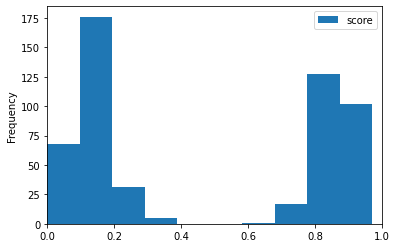

In [28]:
df.plot(kind='hist', xlim=[0,1])

<AxesSubplot:ylabel='Frequency'>

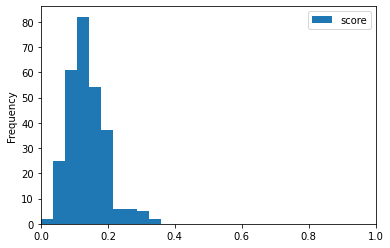

In [29]:
df[df.party == 'Democrat'].plot(kind='hist', xlim=[0,1])

<AxesSubplot:ylabel='Frequency'>

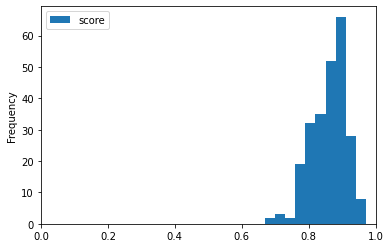

In [31]:
df[df.party == 'Republican'].plot(kind='hist', xlim=[0,1])